# Import libraries

In [37]:
import pandas as pd
import numpy as np
import time
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from bayes_opt import BayesianOptimization
import logging
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

# Setup logging

In [3]:
logging.basicConfig(level=logging.INFO)

# Load and preprocess the dataset

In [5]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [7]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Length: 20640, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bayesian Optimization

## Bayesian Optimization Function

In [15]:
def rf_evaluate(n_estimators, max_depth, min_samples_split):
    model = RandomForestRegressor(n_estimators=int(n_estimators), 
                                   max_depth=int(max_depth), 
                                   min_samples_split=int(min_samples_split),
                                   random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    logging.info(f"Evaluating: n_estimators={n_estimators}, max_depth={max_depth}, "
                 f"min_samples_split={min_samples_split}, MSE={mse}")
    return -mse  # Negative because we want to maximize the function

## Initial Bounds for Hyperparameters

In [17]:
pbounds = {
    'n_estimators': (10, 200),
    'max_depth': (5, 50),
    'min_samples_split': (2, 20)
}

## Bayesian Optimization Setup

In [19]:
optimizer = BayesianOptimization(
    f=rf_evaluate,
    pbounds=pbounds,
    random_state=42,
)

## Timing Bayesian Optimization

In [21]:
start_time = time.time()
optimizer.maximize(init_points=10, n_iter=20)
end_time = time.time()
bayes_time = end_time - start_time

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------


INFO:root:Evaluating: n_estimators=149.07884894416696, max_depth=21.854305348131312, min_samples_split=19.11285751537849, MSE=0.2653170189861679


| 1         | -0.2653   | 21.85     | 19.11     | 149.1     |


INFO:root:Evaluating: n_estimators=39.6389588638785, max_depth=31.93963178886665, min_samples_split=4.808335527963857, MSE=0.25862721680773076


| 2         | -0.2586   | 31.94     | 4.808     | 39.64     |


INFO:root:Evaluating: n_estimators=124.21185223120968, max_depth=7.613762547568976, min_samples_split=17.591170623948834, MSE=0.3777660993037774


| 3         | -0.3778   | 7.614     | 17.59     | 124.2     |


INFO:root:Evaluating: n_estimators=194.2828719107789, max_depth=36.86326600082205, min_samples_split=2.370520897324444, MSE=0.2542835557228826


| 4         | -0.2543   | 36.86     | 2.371     | 194.3     |


INFO:root:Evaluating: n_estimators=44.54674376934912, max_depth=42.45991883601898, min_samples_split=5.822103992208971, MSE=0.2582176922101155


| 5         | -0.2582   | 42.46     | 5.822     | 44.55     |


INFO:root:Evaluating: n_estimators=109.70372201012519, max_depth=13.253202943404522, min_samples_split=7.476360373271679, MSE=0.2679180306940206


| 6         | -0.2679   | 13.25     | 7.476     | 109.7     |


INFO:root:Evaluating: n_estimators=126.2520499972521, max_depth=24.43752583889521, min_samples_split=7.242124523564755, MSE=0.2563704618246912


| 7         | -0.2564   | 24.44     | 7.242     | 126.3     |


INFO:root:Evaluating: n_estimators=79.60875022580143, max_depth=11.277223729341882, min_samples_split=7.258603673633926, MSE=0.2832285995097396


| 8         | -0.2832   | 11.28     | 7.259     | 79.61     |


INFO:root:Evaluating: n_estimators=47.93801861008835, max_depth=25.523149289766618, min_samples_split=16.133167305074245, MSE=0.264727660552396


| 9         | -0.2647   | 25.52     | 16.13     | 47.94     |


INFO:root:Evaluating: n_estimators=18.825578416799566, max_depth=28.140549728612523, min_samples_split=12.663462239516765, MSE=0.2654873875888672


| 10        | -0.2655   | 28.14     | 12.66     | 18.83     |


INFO:root:Evaluating: n_estimators=43.55100754779929, max_depth=35.87825711439075, min_samples_split=13.121245177315057, MSE=0.2621346690441155


| 11        | -0.2621   | 35.88     | 13.12     | 43.55     |


INFO:root:Evaluating: n_estimators=124.7046853532823, max_depth=25.373381667788035, min_samples_split=6.999499758985157, MSE=0.25560079219992315


| 12        | -0.2556   | 25.37     | 6.999     | 124.7     |


INFO:root:Evaluating: n_estimators=135.93538133393065, max_depth=36.245760762662115, min_samples_split=2.0, MSE=0.2551687098680366


| 13        | -0.2552   | 36.25     | 2.0       | 135.9     |


INFO:root:Evaluating: n_estimators=174.77538395953735, max_depth=33.50837921692251, min_samples_split=6.6599698037292105, MSE=0.25539929412595386


| 14        | -0.2554   | 33.51     | 6.66      | 174.8     |


INFO:root:Evaluating: n_estimators=189.75123619604935, max_depth=22.054248663178242, min_samples_split=14.561269686861054, MSE=0.2610863371805434


| 15        | -0.2611   | 22.05     | 14.56     | 189.8     |


INFO:root:Evaluating: n_estimators=184.78768107491476, max_depth=45.72088392603302, min_samples_split=19.079452526902916, MSE=0.2657863843874697


| 16        | -0.2658   | 45.72     | 19.08     | 184.8     |


INFO:root:Evaluating: n_estimators=155.7122378267722, max_depth=41.5776198707209, min_samples_split=9.308222961479338, MSE=0.2570612587808561


| 17        | -0.2571   | 41.58     | 9.308     | 155.7     |


INFO:root:Evaluating: n_estimators=135.13397210567098, max_depth=44.071629287193815, min_samples_split=20.0, MSE=0.2661588646186233


| 18        | -0.2662   | 44.07     | 20.0      | 135.1     |


INFO:root:Evaluating: n_estimators=103.88054738343736, max_depth=32.455311889696645, min_samples_split=2.0, MSE=0.25557993262523654


| 19        | -0.2556   | 32.46     | 2.0       | 103.9     |


INFO:root:Evaluating: n_estimators=117.11750150473571, max_depth=48.018499736444085, min_samples_split=2.0, MSE=0.25538366985927363


| 20        | -0.2554   | 48.02     | 2.0       | 117.1     |


INFO:root:Evaluating: n_estimators=100.88461614244407, max_depth=49.46125012219824, min_samples_split=16.251889866926646, MSE=0.2635490416401009


| 21        | -0.2635   | 49.46     | 16.25     | 100.9     |


INFO:root:Evaluating: n_estimators=160.47345697933952, max_depth=21.84196079818129, min_samples_split=2.0, MSE=0.2552771398465008


| 22        | -0.2553   | 21.84     | 2.0       | 160.5     |


INFO:root:Evaluating: n_estimators=174.9590766301885, max_depth=8.460419372799848, min_samples_split=2.7466734712157463, MSE=0.34182821019409587


| 23        | -0.3418   | 8.46      | 2.747     | 175.0     |


INFO:root:Evaluating: n_estimators=146.94471934539504, max_depth=25.857362576476618, min_samples_split=2.0, MSE=0.2557898170068778


| 24        | -0.2558   | 25.86     | 2.0       | 146.9     |


INFO:root:Evaluating: n_estimators=172.44270183082645, max_depth=50.0, min_samples_split=2.0, MSE=0.25456190076325874


| 25        | -0.2546   | 50.0      | 2.0       | 172.4     |


INFO:root:Evaluating: n_estimators=24.288663589026406, max_depth=50.0, min_samples_split=2.0, MSE=0.2636284029182621


| 26        | -0.2636   | 50.0      | 2.0       | 24.29     |


INFO:root:Evaluating: n_estimators=68.35919524177125, max_depth=50.0, min_samples_split=2.0, MSE=0.2577586891712771


| 27        | -0.2578   | 50.0      | 2.0       | 68.36     |


INFO:root:Evaluating: n_estimators=73.98134612487551, max_depth=45.34568134886977, min_samples_split=19.69798319195905, MSE=0.2669677836249065


| 28        | -0.267    | 45.35     | 19.7      | 73.98     |


INFO:root:Evaluating: n_estimators=34.097439989661765, max_depth=5.5013046193337525, min_samples_split=2.598790282387597, MSE=0.4633917227313939


| 29        | -0.4634   | 5.501     | 2.599     | 34.1      |


INFO:root:Evaluating: n_estimators=10.0, max_depth=50.0, min_samples_split=20.0, MSE=0.28257742250561363


| 30        | -0.2826   | 50.0      | 20.0      | 10.0      |


## Best Parameters from Bayesian Optimization

In [23]:
best_params = optimizer.max['params']
best_params['n_estimators'] = int(best_params['n_estimators'])  # Convert to int
best_params['max_depth'] = int(best_params['max_depth'])  # Convert to int
best_params['min_samples_split'] = int(best_params['min_samples_split'])  # Convert to int
logging.info(f"Best parameters from Bayesian Optimization: {best_params}")

INFO:root:Best parameters from Bayesian Optimization: {'max_depth': 36, 'min_samples_split': 2, 'n_estimators': 194}


## Final Model Training

In [25]:
final_model = RandomForestRegressor(**best_params)
final_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=36, n_estimators=194)

## Model Evaluation

In [27]:
final_predictions = final_model.predict(X_test)
final_mse_bayes = mean_squared_error(y_test, final_predictions)
logging.info(f'Final MSE (Bayesian Optimization): {final_mse_bayes}')

INFO:root:Final MSE (Bayesian Optimization): 0.25217320809058724


# Random Search Hyperparameter Tuning (for comparison)

In [29]:
# Define parameter distributions for Randomized Search
param_distributions = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20]
}

In [39]:
# Initialize variables to track the best parameters and MSE
best_mse_random = float('inf')
best_params_random = None
n_iter = 20  # Number of random configurations to sample

# Start timing for Random Search
start_time_random = time.time()

# Iterate over random parameter combinations
for _ in range(n_iter):
    # Randomly sample a combination of parameters
    params = {
        'n_estimators': random.choice(param_distributions['n_estimators']),
        'max_depth': random.choice(param_distributions['max_depth']),
        'min_samples_split': random.choice(param_distributions['min_samples_split']),
    }

    # Train the model with the sampled parameters
    model = RandomForestRegressor(**params, random_state=42)
    model.fit(X_train, y_train)

    # Predict and calculate MSE on the test set
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)

    # Track the best parameters and MSE
    if mse < best_mse_random:
        best_mse_random = mse
        best_params_random = params

# End timing for Random Search
end_time_random = time.time()
random_search_time = end_time_random - start_time_random

In [41]:
# Display the results
print(f"Best Parameters (Random Search without CV): {best_params_random}")
print(f"Best MSE (Random Search without CV): {best_mse_random}")

Best Parameters (Random Search without CV): {'n_estimators': 150, 'max_depth': 40, 'min_samples_split': 2}
Best MSE (Random Search without CV): 0.25466249140250824


In [43]:
logging.info(f"Best parameters from Random Search: {best_params_random}")
logging.info(f'Final MSE (Random Search): {best_mse_random}')

INFO:root:Best parameters from Random Search: {'n_estimators': 150, 'max_depth': 40, 'min_samples_split': 2}
INFO:root:Final MSE (Random Search): 0.25466249140250824


# Summary of Results

In [45]:
logging.info(f"Bayesian Optimization Time: {bayes_time:.2f} seconds")
logging.info(f"Random Search Time: {random_search_time:.2f} seconds")

INFO:root:Bayesian Optimization Time: 889.99 seconds
INFO:root:Random Search Time: 525.57 seconds


In [110]:
logging.info(f"Grid Search Time (without CV): {grid_search_time:.2f} seconds")

INFO:root:Grid Search Time (without CV): 5058.20 seconds


# Enhanced Approach of Bayesian Optimization

## Consistent cross-validation function

In [47]:
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    return -scores.mean()

## Adaptive Acquisition Function

In [49]:
# Adaptive Acquisition Function: combines Expected Improvement (EI) and Probability of Improvement (PI)
def adaptive_acquisition(X, model, best_y, alpha=0.5, xi=0.01):
    mu, sigma = model.predict(X, return_std=True)
    imp = mu - best_y - xi
    Z = imp / sigma
    ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
    pi = norm.cdf(Z)
    
    # Dynamically mix between EI and PI
    adaptive_metric = (alpha * ei) + ((1 - alpha) * pi)
    adaptive_metric[sigma == 0.0] = 0.0
    return adaptive_metric

## Bayesian Optimization function with adaptive bounds adjustment

In [51]:
def rf_evaluate(n_estimators, max_depth, min_samples_split):
    model = RandomForestRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        random_state=42
    )
    mse = evaluate_model(model, X_train, y_train)
    logging.info(f"Evaluating: n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}, MSE={mse}")
    return -mse  # Negative because we want to maximize in Bayesian optimization

## Initial parameter bounds for hyperparameters

In [53]:
pbounds = {
    'n_estimators': (10, 200),
    'max_depth': (5, 50),
    'min_samples_split': (2, 20)
}

## Adaptive bounds adjustment based on confidence intervals

In [55]:
def adjust_bounds(current_bounds, optimizer, confidence_level=0.95):
    # Retrieve the observed parameters and their confidence intervals
    observed_params = optimizer.res
    new_bounds = {}
    for param, (low, high) in current_bounds.items():
        vals = [obs["params"][param] for obs in observed_params]
        mean_val, ci = np.mean(vals), np.std(vals) * norm.ppf((1 + confidence_level) / 2)
        new_bounds[param] = (max(low, mean_val - ci), min(high, mean_val + ci))
    return new_bounds

## Set up the Bayesian Optimizer

In [57]:
optimizer = BayesianOptimization(f=rf_evaluate, pbounds=pbounds, random_state=42)

## Run Bayesian Optimization with bounds adjustment and adaptive acquisition

In [59]:
start_time = time.time()
for i in range(10):  # Initial 10 random points
    optimizer.maximize(init_points=1, n_iter=1)
    pbounds = adjust_bounds(pbounds, optimizer)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------


INFO:root:Evaluating: n_estimators=149.07884894416696, max_depth=21.854305348131312, min_samples_split=19.11285751537849, MSE=0.2693244152040076


| 1         | -0.2693   | 21.85     | 19.11     | 149.1     |


INFO:root:Evaluating: n_estimators=197.3201489751336, max_depth=48.71087037887247, min_samples_split=13.383150759418465, MSE=0.2650810584494125


| 2         | -0.2651   | 48.71     | 13.38     | 197.3     |
|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------


INFO:root:Evaluating: n_estimators=39.6389588638785, max_depth=31.93963178886665, min_samples_split=4.808335527963857, MSE=0.2665136432871123


| 3         | -0.2665   | 31.94     | 4.808     | 39.64     |


INFO:root:Evaluating: n_estimators=197.8291992377963, max_depth=49.604688258130366, min_samples_split=11.640340410240345, MSE=0.2638362138079436


| 4         | -0.2638   | 49.6      | 11.64     | 197.8     |
|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------


INFO:root:Evaluating: n_estimators=124.21185223120968, max_depth=7.613762547568976, min_samples_split=17.591170623948834, MSE=0.3598067207032641


| 5         | -0.3598   | 7.614     | 17.59     | 124.2     |


INFO:root:Evaluating: n_estimators=168.6415249529784, max_depth=38.09876300307687, min_samples_split=4.660425080171462, MSE=0.2607058571488726


| 6         | -0.2607   | 38.1      | 4.66      | 168.6     |
|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------


INFO:root:Evaluating: n_estimators=194.2828719107789, max_depth=36.86326600082205, min_samples_split=2.370520897324444, MSE=0.2606021912853653


| 7         | -0.2606   | 36.86     | 2.371     | 194.3     |


INFO:root:Evaluating: n_estimators=182.85619503292125, max_depth=5.0, min_samples_split=20.0, MSE=0.444681609805263


| 8         | -0.4447   | 5.0       | 20.0      | 182.9     |
|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------


INFO:root:Evaluating: n_estimators=44.54674376934912, max_depth=42.45991883601898, min_samples_split=5.822103992208971, MSE=0.26518329585271455


| 9         | -0.2652   | 42.46     | 5.822     | 44.55     |


INFO:root:Evaluating: n_estimators=144.22091405193277, max_depth=49.947483452034895, min_samples_split=19.5619102414315, MSE=0.26919271760766417


| 10        | -0.2692   | 49.95     | 19.56     | 144.2     |
|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------


INFO:root:Evaluating: n_estimators=109.70372201012519, max_depth=13.253202943404522, min_samples_split=7.476360373271679, MSE=0.2693374156262678


| 11        | -0.2693   | 13.25     | 7.476     | 109.7     |


INFO:root:Evaluating: n_estimators=86.02175389514696, max_depth=23.75463262843808, min_samples_split=2.0, MSE=0.2617948323858953


| 12        | -0.2618   | 23.75     | 2.0       | 86.02     |
|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------


INFO:root:Evaluating: n_estimators=126.2520499972521, max_depth=24.43752583889521, min_samples_split=7.242124523564755, MSE=0.26222416680485905


| 13        | -0.2622   | 24.44     | 7.242     | 126.3     |


INFO:root:Evaluating: n_estimators=109.68388824600912, max_depth=44.16096623361642, min_samples_split=2.0, MSE=0.26135356190337955


| 14        | -0.2614   | 44.16     | 2.0       | 109.7     |
|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------


INFO:root:Evaluating: n_estimators=79.60875022580143, max_depth=11.277223729341882, min_samples_split=7.258603673633926, MSE=0.28198647594242904


| 15        | -0.282    | 11.28     | 7.259     | 79.61     |


INFO:root:Evaluating: n_estimators=78.83082810056791, max_depth=50.0, min_samples_split=20.0, MSE=0.27134962872743185


| 16        | -0.2713   | 50.0      | 20.0      | 78.83     |
|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------


INFO:root:Evaluating: n_estimators=47.93801861008835, max_depth=25.523149289766618, min_samples_split=16.133167305074245, MSE=0.26986108765216177


| 17        | -0.2699   | 25.52     | 16.13     | 47.94     |


INFO:root:Evaluating: n_estimators=10.0, max_depth=50.0, min_samples_split=20.0, MSE=0.28706052754429595


| 18        | -0.2871   | 50.0      | 20.0      | 10.0      |
|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------


INFO:root:Evaluating: n_estimators=18.825578416799566, max_depth=28.140549728612523, min_samples_split=12.663462239516765, MSE=0.2752076778119653


| 19        | -0.2752   | 28.14     | 12.66     | 18.83     |


INFO:root:Evaluating: n_estimators=143.44020668436477, max_depth=37.010283130035894, min_samples_split=2.0, MSE=0.26077978308831107


| 20        | -0.2608   | 37.01     | 2.0       | 143.4     |


## Run Bayesian optimization with the narrowed bounds for the rest of the iterations

In [61]:
optimizer.maximize(init_points=0, n_iter=20)
end_time = time.time()
bayes_time = end_time - start_time

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------


INFO:root:Evaluating: n_estimators=29.167310740465034, max_depth=5.622827870591158, min_samples_split=2.476399423075649, MSE=0.44520442440207597


| 21        | -0.4452   | 5.623     | 2.476     | 29.17     |


INFO:root:Evaluating: n_estimators=100.81575405752507, max_depth=32.96731378847348, min_samples_split=20.0, MSE=0.27027542314949143


| 22        | -0.2703   | 32.97     | 20.0      | 100.8     |


INFO:root:Evaluating: n_estimators=169.16281995092103, max_depth=49.338853476787186, min_samples_split=19.85685680795061, MSE=0.2692165689808488


| 23        | -0.2692   | 49.34     | 19.86     | 169.2     |


INFO:root:Evaluating: n_estimators=33.38136884883099, max_depth=42.356468700773235, min_samples_split=20.0, MSE=0.27554012542139045


| 24        | -0.2755   | 42.36     | 20.0      | 33.38     |


INFO:root:Evaluating: n_estimators=68.0498509056359, max_depth=39.774718643611564, min_samples_split=2.625213667914733, MSE=0.26355272565046317


| 25        | -0.2636   | 39.77     | 2.625     | 68.05     |


INFO:root:Evaluating: n_estimators=119.84244505119077, max_depth=50.0, min_samples_split=20.0, MSE=0.2700106589977128


| 26        | -0.27     | 50.0      | 20.0      | 119.8     |


INFO:root:Evaluating: n_estimators=20.5883887965211, max_depth=50.0, min_samples_split=2.0, MSE=0.27356388741701776


| 27        | -0.2736   | 50.0      | 2.0       | 20.59     |


INFO:root:Evaluating: n_estimators=177.8754015366121, max_depth=49.356830177904726, min_samples_split=2.1292783098874155, MSE=0.2605631347592448


| 28        | -0.2606   | 49.36     | 2.129     | 177.9     |


INFO:root:Evaluating: n_estimators=70.41880686949321, max_depth=28.968397946350308, min_samples_split=20.0, MSE=0.2716820684136928


| 29        | -0.2717   | 28.97     | 20.0      | 70.42     |


INFO:root:Evaluating: n_estimators=88.81207312361201, max_depth=50.0, min_samples_split=2.0, MSE=0.26221323670336505


| 30        | -0.2622   | 50.0      | 2.0       | 88.81     |


INFO:root:Evaluating: n_estimators=106.72702273989987, max_depth=26.998822598737497, min_samples_split=2.0, MSE=0.2612033266348336


| 31        | -0.2612   | 27.0      | 2.0       | 106.7     |


INFO:root:Evaluating: n_estimators=127.42394057568508, max_depth=49.98369341455228, min_samples_split=3.301706301553182, MSE=0.2609477697316934


| 32        | -0.2609   | 49.98     | 3.302     | 127.4     |


INFO:root:Evaluating: n_estimators=57.2580360834954, max_depth=50.0, min_samples_split=20.0, MSE=0.2714074666894121


| 33        | -0.2714   | 50.0      | 20.0      | 57.26     |


INFO:root:Evaluating: n_estimators=155.19734332259125, max_depth=49.786548786484694, min_samples_split=2.3630610548978015, MSE=0.26071742892819466


| 34        | -0.2607   | 49.79     | 2.363     | 155.2     |


INFO:root:Evaluating: n_estimators=149.0473939208446, max_depth=18.753976747929663, min_samples_split=2.0, MSE=0.26113833600298314


| 35        | -0.2611   | 18.75     | 2.0       | 149.0     |


INFO:root:Evaluating: n_estimators=94.72050459039768, max_depth=5.553980228840987, min_samples_split=2.1001889730682213, MSE=0.44462406482607164


| 36        | -0.4446   | 5.554     | 2.1       | 94.72     |


INFO:root:Evaluating: n_estimators=65.7922810789168, max_depth=20.652318761397787, min_samples_split=2.0, MSE=0.2629529216432064


| 37        | -0.263    | 20.65     | 2.0       | 65.79     |


INFO:root:Evaluating: n_estimators=64.78412343276082, max_depth=5.6943022745009175, min_samples_split=20.0, MSE=0.44481001002134846


| 38        | -0.4448   | 5.694     | 20.0      | 64.78     |


INFO:root:Evaluating: n_estimators=84.16094029571586, max_depth=35.25870483399639, min_samples_split=11.119104927819802, MSE=0.2650050597116085


| 39        | -0.265    | 35.26     | 11.12     | 84.16     |


INFO:root:Evaluating: n_estimators=132.12695591553688, max_depth=35.52217844713547, min_samples_split=20.0, MSE=0.27014344621275505


| 40        | -0.2701   | 35.52     | 20.0      | 132.1     |


## Extract best parameters and train final Bayesian optimized model

In [63]:
best_params = optimizer.max['params']
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_samples_split'] = int(best_params['min_samples_split'])
logging.info(f"Best parameters from Bayesian Optimization: {best_params}")

INFO:root:Best parameters from Bayesian Optimization: {'max_depth': 49, 'min_samples_split': 2, 'n_estimators': 177}


In [65]:
final_model_bayes = RandomForestRegressor(**best_params)
final_model_bayes.fit(X_train, y_train)

RandomForestRegressor(max_depth=49, n_estimators=177)

In [67]:
final_predictions_bayes = final_model_bayes.predict(X_test)
final_mse_bayes = mean_squared_error(y_test, final_predictions_bayes)
logging.info(f'Final MSE (Bayesian Optimization): {final_mse_bayes}')

INFO:root:Final MSE (Bayesian Optimization): 0.25365435951547455


In [69]:
logging.info(f"Bayesian Optimization Time: {bayes_time:.2f} seconds")

INFO:root:Bayesian Optimization Time: 5342.20 seconds


In [129]:
import matplotlib.pyplot as plt
import numpy as np

In [133]:
# 1. Plot of Best Objective Function Value over Iterations
def plot_best_mse_over_iterations(optimizer):
    iterations = range(len(optimizer.res))
    best_mse_values = [res['target'] for res in optimizer.res]
    
    plt.figure(figsize=(10, 6))
    plt.plot(iterations, best_mse_values, marker='o', linestyle='-', color='b', label='Best MSE')
    plt.title('Best MSE Over Iterations in Bayesian Optimization')
    plt.xlabel('Iterations')
    plt.ylabel('Best MSE')
    plt.grid(True)
    plt.legend()
    plt.show()

# 2. Hyperparameter Convergence Visualization
def plot_hyperparameter_convergence(optimizer):
    # Extract hyperparameter values over iterations
    n_estimators_values = [res['params']['n_estimators'] for res in optimizer.res]
    max_depth_values = [res['params']['max_depth'] for res in optimizer.res]
    min_samples_split_values = [res['params']['min_samples_split'] for res in optimizer.res]

    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 3, 1)
    plt.plot(range(len(optimizer.res)), n_estimators_values, marker='x', color='r', label='n_estimators')
    plt.title('n_estimators over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('n_estimators')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(range(len(optimizer.res)), max_depth_values, marker='x', color='g', label='max_depth')
    plt.title('max_depth over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('max_depth')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(range(len(optimizer.res)), min_samples_split_values, marker='x', color='b', label='min_samples_split')
    plt.title('min_samples_split over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('min_samples_split')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

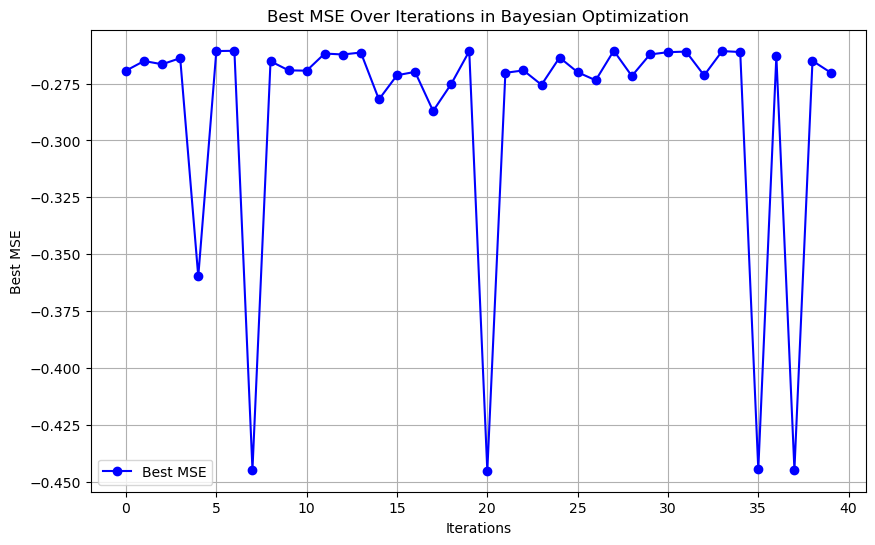

In [137]:
# Visualize Results
plot_best_mse_over_iterations(optimizer)

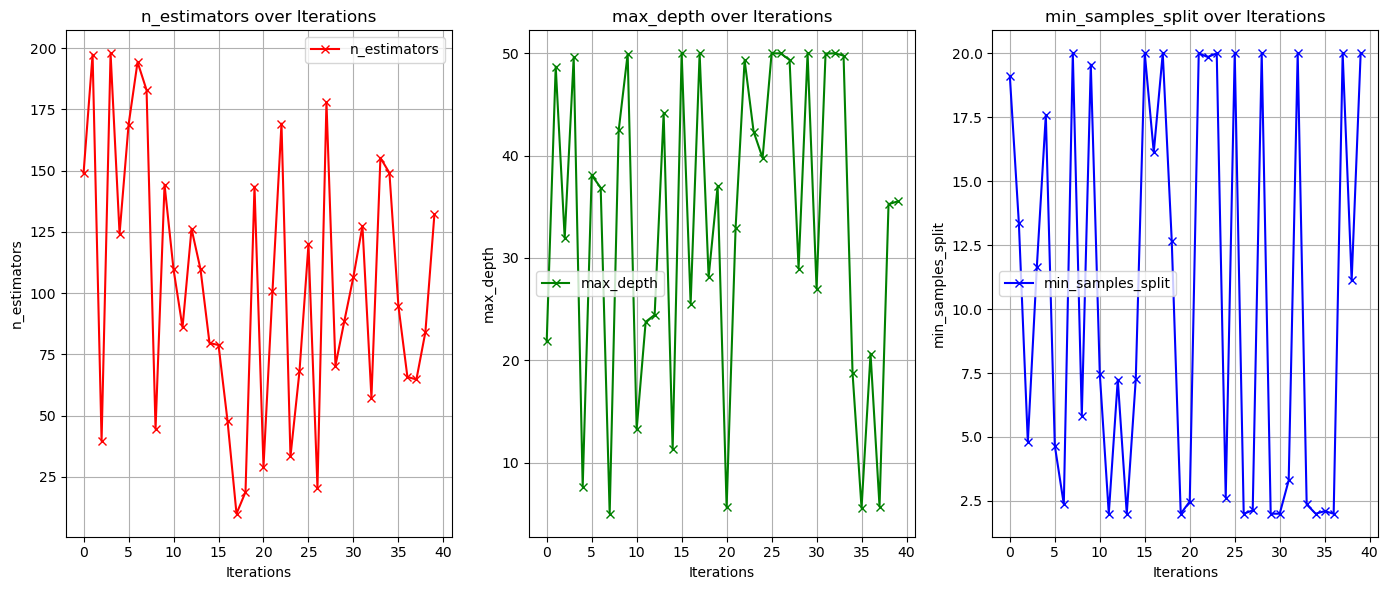

In [139]:
plot_hyperparameter_convergence(optimizer)

# Grid Search Hyperparameter Tuning (for comparison)

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import itertools
import time

In [83]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20]
}

In [85]:
# Generate all possible combinations of parameters from the grid
param_combinations = list(itertools.product(
    param_grid['n_estimators'],
    param_grid['max_depth'],
    param_grid['min_samples_split']
))

In [87]:
# Initialize variables to track the best parameters and MSE
best_mse_grid = float('inf')
best_params_grid = None

In [89]:
# Start timing for Grid Search
start_time_grid = time.time()

# Iterate over all combinations of parameters
for params in param_combinations:
    # Unpack the parameters
    n_estimators, max_depth, min_samples_split = params
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )

    # Train the model with the current parameter combination
    model.fit(X_train, y_train)

    # Predict and calculate MSE on the test set
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)

    # Track the best parameters and MSE
    if mse < best_mse_grid:
        best_mse_grid = mse
        best_params_grid = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split
        }

# End timing for Grid Search
end_time_grid = time.time()
grid_search_time = end_time_grid - start_time_grid

In [106]:
# Display the results
print(f"Best Parameters (Grid Search without CV): {best_params_grid}")
print(f"Best MSE (Grid Search without CV): {best_mse_grid}")

Best Parameters (Grid Search without CV): {'n_estimators': 200, 'max_depth': 40, 'min_samples_split': 2}
Best MSE (Grid Search without CV): 0.25395595827057227
